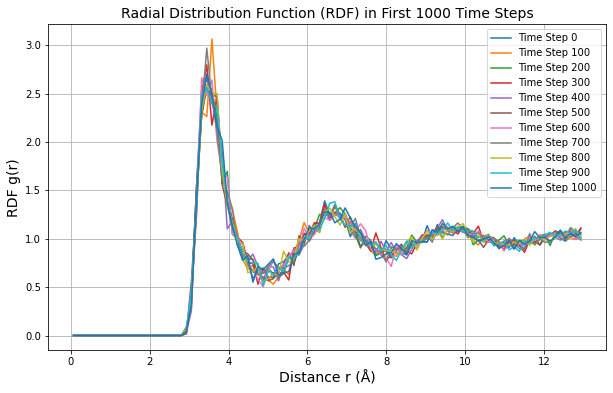

(100100, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_rdf_data(filename):
    rdf_data = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Process the lines to extract RDF data
        for line in lines:
            # Skip comment lines
            if line.startswith('#'):
                continue
            # Split the line into columns
            columns = line.split()
            
            # Ensure the line has at least 4 columns (index, distance, RDF, coordination number)
            if len(columns) >= 4:
                index = int(columns[0])
                distance = float(columns[1])  # Bin center (distance)
                rdf_value = float(columns[2])  # RDF value
                coordination = float(columns[3])  # Coordination number
                rdf_data.append((distance, rdf_value, coordination))
    
    return np.array(rdf_data)

def plot_rdf_in_chunks(rdf_data, chunk_size=100, num_chunks=10):
    # Calculate the number of chunks
    num_chunks_to_plot = min(num_chunks, len(rdf_data) // chunk_size)  
    
    plt.figure(figsize=(10, 6))
    
    # Plot the first n chunks
    for i in range(num_chunks_to_plot):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        chunk = rdf_data[start_idx:end_idx]
        
        # Extract distances and RDF values for this chunk
        distances = chunk[:, 0]
        rdf_values = chunk[:, 1]
        
        # Plot this chunk
        plt.plot(distances, rdf_values, label=f'Time Step {i*100}')
    
    plt.xlabel('Distance r (Å)', fontsize=14)
    plt.ylabel('RDF g(r)', fontsize=14)
    plt.title('Radial Distribution Function (RDF) in First 1000 Time Steps', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.savefig('rdf_first10.pdf')
    plt.show()

# Main function to read data and plot it
def main():
    filename = 'sigma2_same.txt'  
    rdf_data = read_rdf_data(filename)
    
    # Plot RDF data in chunks of 100, but only for the first n chunks
    plot_rdf_in_chunks(rdf_data, chunk_size=100, num_chunks=11)

if __name__ == '__main__':
    main()

print(np.shape(read_rdf_data('sigma2_same.txt')))

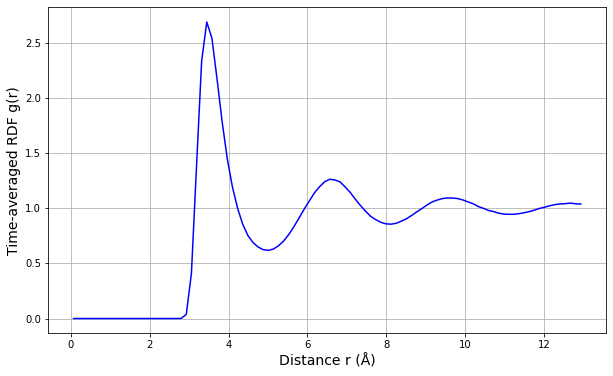

In [2]:
def average_rdf(rdf_data, chunk_size=100):
    # Calculate the number of chunks
    num_chunks = len(rdf_data) // chunk_size
    
    # Initialize an array to store the accumulated RDF values
    accumulated_rdf = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF
    count = 0  # Keep track of the number of time steps processed
    
    # Iterate through all chunks and accumulate RDF values
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        chunk = rdf_data[start_idx:end_idx]
        
        # Extract distances and RDF values for this chunk
        distances = chunk[:, 0]
        rdf_values = chunk[:, 1]
        
        # Accumulate the RDF values
        if count == 0:
            accumulated_rdf[:, 0] = distances  # Initialize distance array
        accumulated_rdf[:, 1] += rdf_values
        count += 1
    
    # Average the accumulated RDF values
    averaged_rdf = accumulated_rdf[:, 1] / count
    
    return accumulated_rdf[:, 0], averaged_rdf

def plot_averaged_rdf(distances, averaged_rdf):
    plt.figure(figsize=(10, 6))
    plt.plot(distances, averaged_rdf, label='Averaged RDF', color='blue')
    plt.xlabel('Distance r (Å)', fontsize=14)
    plt.ylabel('Time-averaged RDF g(r)', fontsize=14)
    #plt.title('Time-averaged Radial Distribution Function (RDF)', fontsize=14)
    plt.grid(True)
    #plt.legend()
    plt.savefig('rdf_averaged.pdf')
    plt.show()

# Main function to read data, average it, and plot it
def main():
    filename = 'sigma2_same.txt'  
    rdf_data = read_rdf_data(filename)
    
    # Calculate the averaged RDF
    distances, averaged_rdf = average_rdf(rdf_data, chunk_size=100)
    
    # Plot the averaged RDF
    plot_averaged_rdf(distances, averaged_rdf)

rdf_data=read_rdf_data('sigma2_same.txt')
main()
distances1, averaged_rdf1 = average_rdf(rdf_data, chunk_size=100)

First peak occurs at approximately 3.445 Å


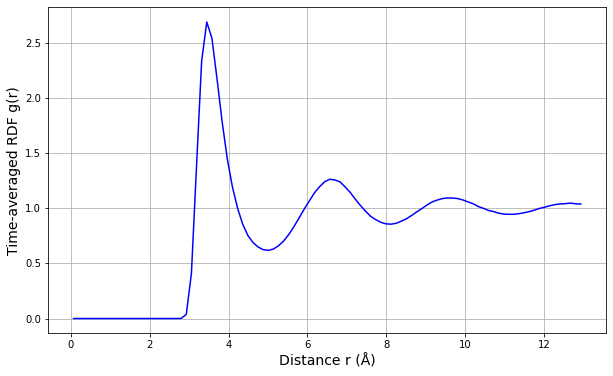

In [3]:
import numpy as np

def find_first_peak(distances, rdf_values):
    # Focus only on the first part of the curve (up to ~6-8 Å), since first peak is usually near sigma
    cutoff = 8.0  # Angstroms — adjust if necessary
    mask = distances <= cutoff

    # Find the index of the maximum RDF value within the cutoff range
    first_peak_index = np.argmax(rdf_values[mask])

    # Get the corresponding radial distance
    first_peak_distance = distances[mask][first_peak_index]

    return first_peak_distance

# After averaging RDF
distances, averaged_rdf = average_rdf(rdf_data, chunk_size=100)

# Find first peak distance
first_peak_distance = find_first_peak(distances, averaged_rdf)

# Print or save the result
print(f"First peak occurs at approximately {first_peak_distance:.3f} Å")

# Continue with plotting
plot_averaged_rdf(distances, averaged_rdf)


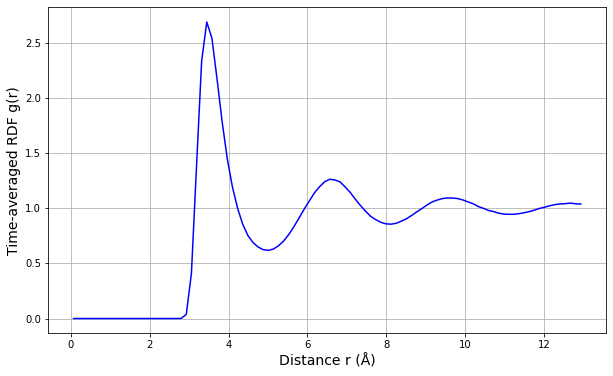

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(distances1, averaged_rdf1, label='Averaged RDF', color='blue')
plt.xlabel('Distance r (Å)', fontsize=14)
plt.ylabel('Time-averaged RDF g(r)', fontsize=14)
#plt.title('Time-averaged Radial Distribution Function (RDF)', fontsize=14)
plt.grid(True)
#plt.legend()
plt.show()

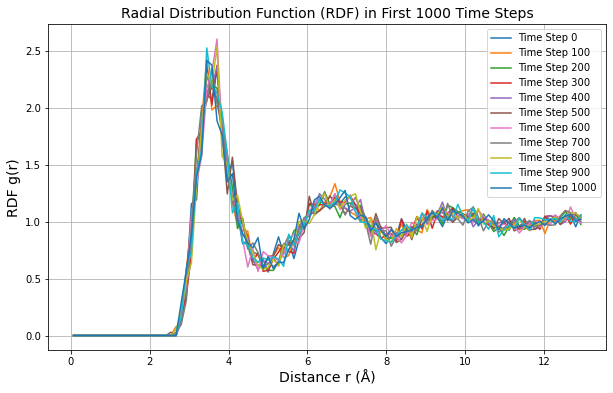

(100100, 3)


In [5]:
# Main function to read data and plot it
def main2():
    filename = 'sigma2_diff.txt'  
    rdf_data = read_rdf_data(filename)
    
    # Plot RDF data in chunks of 100, but only for the first n chunks
    plot_rdf_in_chunks(rdf_data, chunk_size=100, num_chunks=11)

main2()

print(np.shape(read_rdf_data('sigma2_diff.txt')))

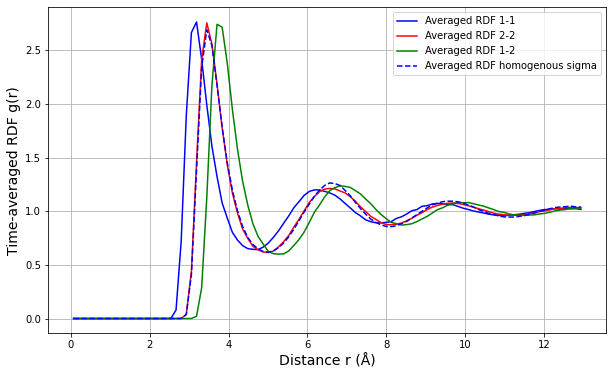

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def read_rdf_data(filename):
    rdf_data = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Process the lines to extract RDF data
        for line in lines:
            # Skip comment lines
            if line.startswith('#'):
                continue
            # Split the line into columns
            columns = line.split()
            
            # Ensure the line has at least 8 columns
            if len(columns) >= 8:
                distance = float(columns[1])  # Distance r
                g_11 = float(columns[2])  # g(r) for 1-1
                g_22 = float(columns[4])  # g(r) for 2-2
                g_12 = float(columns[6])  # g(r) for 1-2
                rdf_data.append((distance, g_11, g_22, g_12))
    
    return np.array(rdf_data)

def average_rdf(rdf_data, chunk_size=100):
    # Calculate the number of chunks
    num_chunks = len(rdf_data) // chunk_size
    
    # Initialize arrays to store the accumulated RDF values for each type
    accumulated_rdf_11 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 1-1
    accumulated_rdf_22 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 2-2
    accumulated_rdf_12 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 1-2
    
    count = 0  # Keep track of the number of chunks processed
    
    # Iterate through all chunks and accumulate RDF values
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        chunk = rdf_data[start_idx:end_idx]
        
        # Extract distances and RDF values for all three types
        distances = chunk[:, 0]
        rdf_values_11 = chunk[:, 1]  # g(r) for 1-1
        rdf_values_22 = chunk[:, 2]  # g(r) for 2-2
        rdf_values_12 = chunk[:, 3]  # g(r) for 1-2
        
        # Accumulate the RDF values
        if count == 0:
            accumulated_rdf_11[:, 0] = distances  # Initialize distance array for 1-1
            accumulated_rdf_22[:, 0] = distances  # Initialize distance array for 2-2
            accumulated_rdf_12[:, 0] = distances  # Initialize distance array for 1-2
            
        accumulated_rdf_11[:, 1] += rdf_values_11
        accumulated_rdf_22[:, 1] += rdf_values_22
        accumulated_rdf_12[:, 1] += rdf_values_12
        
        count += 1
    
    # Average the accumulated RDF values
    averaged_rdf_11 = accumulated_rdf_11[:, 1] / count
    averaged_rdf_22 = accumulated_rdf_22[:, 1] / count
    averaged_rdf_12 = accumulated_rdf_12[:, 1] / count
    
    return accumulated_rdf_11[:, 0], averaged_rdf_11, averaged_rdf_22, averaged_rdf_12

def plot_averaged_rdf(distances, averaged_rdf_11, averaged_rdf_22, averaged_rdf_12):
    plt.figure(figsize=(10, 6))

    # Plot the averaged RDFs for all three types
    plt.plot(distances, averaged_rdf_11, label='Averaged RDF 1-1', color='blue')
    plt.plot(distances, averaged_rdf_22, label='Averaged RDF 2-2', color='red')
    plt.plot(distances, averaged_rdf_12, label='Averaged RDF 1-2', color='green')
    plt.plot(distances1, averaged_rdf1, label='Averaged RDF homogenous sigma', color='blue', linestyle='dashed')

    # Add labels and title
    plt.xlabel('Distance r (Å)', fontsize=14)
    plt.ylabel('Time-averaged RDF g(r)', fontsize=14)
    #plt.title('Time-averaged Radial Distribution Function (RDF)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.savefig('rdf_averaged_all_types.pdf')
    plt.show()

# Main function to read data, average it, and plot it
def main():
    filename = 'mixed_rdf.txt'  
    rdf_data = read_rdf_data(filename)
    
    # Calculate the averaged RDF for all types
    distances, averaged_rdf_11, averaged_rdf_22, averaged_rdf_12 = average_rdf(rdf_data, chunk_size=100)
    
    # Plot the averaged RDF
    plot_averaged_rdf(distances, averaged_rdf_11, averaged_rdf_12, averaged_rdf_22)

main()


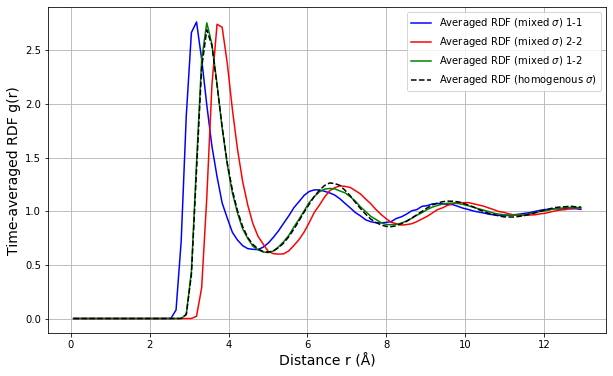

First peak (homogenous) occurs at approximately 3.445 Å
First peak (1-1) occurs at approximately 3.185 Å
First peak (2-2) occurs at approximately 3.705 Å
First peak (1-2) occurs at approximately 3.445 Å


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def read_rdf_data(filename):
    rdf_data = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Process the lines to extract RDF data
        for line in lines:
            # Skip comment lines
            if line.startswith('#'):
                continue
            # Split the line into columns
            columns = line.split()
            
            # Ensure the line has at least 8 columns
            if len(columns) >= 8:
                distance = float(columns[1])  # Distance r
                g_11 = float(columns[2])  # g(r) for 1-1
                g_22 = float(columns[4])  # g(r) for 2-2
                g_12 = float(columns[6])  # g(r) for 1-2
                rdf_data.append((distance, g_11, g_22, g_12))
    
    return np.array(rdf_data)

def average_rdf(rdf_data, chunk_size=100):
    # Calculate the number of chunks
    num_chunks = len(rdf_data) // chunk_size
    
    # Initialize arrays to store the accumulated RDF values for each type
    accumulated_rdf_11 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 1-1
    accumulated_rdf_22 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 2-2
    accumulated_rdf_12 = np.zeros((chunk_size, 2))  # 2 columns: distance and accumulated RDF for 1-2
    
    count = 0  # Keep track of the number of chunks processed
    
    # Iterate through all chunks and accumulate RDF values
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size
        chunk = rdf_data[start_idx:end_idx]
        
        # Extract distances and RDF values for all three types
        distances = chunk[:, 0]
        rdf_values_11 = chunk[:, 1]  # g(r) for 1-1
        rdf_values_22 = chunk[:, 2]  # g(r) for 2-2
        rdf_values_12 = chunk[:, 3]  # g(r) for 1-2
        
        # Accumulate the RDF values
        if count == 0:
            accumulated_rdf_11[:, 0] = distances  # Initialize distance array for 1-1
            accumulated_rdf_22[:, 0] = distances  # Initialize distance array for 2-2
            accumulated_rdf_12[:, 0] = distances  # Initialize distance array for 1-2
            
        accumulated_rdf_11[:, 1] += rdf_values_11
        accumulated_rdf_22[:, 1] += rdf_values_22
        accumulated_rdf_12[:, 1] += rdf_values_12
        
        count += 1
    
    # Average the accumulated RDF values
    averaged_rdf_11 = accumulated_rdf_11[:, 1] / count
    averaged_rdf_22 = accumulated_rdf_22[:, 1] / count
    averaged_rdf_12 = accumulated_rdf_12[:, 1] / count
    
    return accumulated_rdf_11[:, 0], averaged_rdf_11, averaged_rdf_22, averaged_rdf_12

def plot_averaged_rdf(distances, averaged_rdf_11, averaged_rdf_22, averaged_rdf_12):
    plt.figure(figsize=(10, 6))

    # Plot the averaged RDFs for all three types
    plt.plot(distances, averaged_rdf_11, label=r'Averaged RDF (mixed $\sigma$) 1-1', color='blue')
    plt.plot(distances, averaged_rdf_22, label='Averaged RDF (mixed $\sigma$) 2-2', color='red')
    plt.plot(distances, averaged_rdf_12, label='Averaged RDF (mixed $\sigma$) 1-2', color='green')
    plt.plot(distances1, averaged_rdf1, label=r'Averaged RDF (homogenous $\sigma$)', color='black', linestyle='dashed')

    # Add labels and title
    plt.xlabel('Distance r (Å)', fontsize=14)
    plt.ylabel('Time-averaged RDF g(r)', fontsize=14)
    #plt.title('Time-averaged Radial Distribution Function (RDF)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.savefig('rdf_averaged_all_types.pdf')
    plt.show()
    
def find_first_peak(distances, rdf_values):
    # Focus only on the first part of the curve (up to ~6-8 Å), since first peak is usually near sigma
    cutoff = 8.0  # Angstroms — adjust if necessary
    mask = distances <= cutoff

    # Find the index of the maximum RDF value within the cutoff range
    first_peak_index = np.argmax(rdf_values[mask])

    # Get the corresponding radial distance
    first_peak_distance = distances[mask][first_peak_index]

    return first_peak_distance


# Main function to read data, average it, and plot it
def main():
    filename = 'mixed_rdf.txt'  
    rdf_data = read_rdf_data(filename)
    
    # Calculate the averaged RDF for all types
    distances, averaged_rdf_11, averaged_rdf_22, averaged_rdf_12 = average_rdf(rdf_data, chunk_size=100)
    
    # Plot the averaged RDF
    plot_averaged_rdf(distances, averaged_rdf_11, averaged_rdf_22, averaged_rdf_12)
    
    first_peak_distance_hom = find_first_peak(distances, averaged_rdf1)
    first_peak_distance_11 = find_first_peak(distances, averaged_rdf_11)
    first_peak_distance_22 = find_first_peak(distances, averaged_rdf_22)
    first_peak_distance_12 = find_first_peak(distances, averaged_rdf_12)
    
    print(f"First peak (homogenous) occurs at approximately {first_peak_distance_hom:.3f} Å")
    print(f"First peak (1-1) occurs at approximately {first_peak_distance_11:.3f} Å")
    print(f"First peak (2-2) occurs at approximately {first_peak_distance_22:.3f} Å")
    print(f"First peak (1-2) occurs at approximately {first_peak_distance_12:.3f} Å")

main()
